<a href="https://colab.research.google.com/github/ahmadcah/project_pembelajaran_mesin_2018-198/blob/main/GoogleColab/trainPlacesModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA**

In [ ]:
import multiprocessing
multiprocessing.cpu_count()

4

In [ ]:
!rm -rf /content/p365s

In [ ]:
!rm -rf /content/places365_standard

In [ ]:
!pip install patool

     |████████████████████████████████| 77 kB 3.4 MB/s 


In [ ]:
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/Data/p365s.rar", outdir="/content/")

patool: Extracting /content/drive/MyDrive/Data/p365s.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/Data/p365s.rar
patool:     with cwd='/content/'
patool: ... /content/drive/MyDrive/Data/p365s.rar extracted to `/content/'.


'/content/'

In [ ]:
!apt-get install rar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  rar
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 295 kB of archives.
After this operation, 799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 rar amd64 2:5.5.0-1 [295 kB]
Fetched 295 kB in 1s (336 kB/s)
Selecting previously unselected package rar.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../rar_2%3a5.5.0-1_amd64.deb ...
Unpacking rar (2:5.5.0-1) ...
Setting up rar (2:5.5.0-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!rar a /content/drive/MyDrive/Data/p365s.rar /content/p365s

In [ ]:
import tarfile

tar = tarfile.open("/content/drive/MyDrive/Data/places365standard_easyformat.tar", "r:")
tar.extractall(path='/content')
tar.close()

# **Preprocessing**

In [ ]:
import os

def count_file(target):
  totalImageFile = 0
  for f in os.listdir(target):
    for i in os.listdir(target+"/"+f):
      totalImageFile +=1
  print(totalImageFile)

In [ ]:
os.system('')

32512

In [ ]:
count_file("/content/places365_standard/train")
count_file("/content/places365_standard/val")

1803460
36500


In [ ]:
import shutil
valF = "/content/places365_standard/val"
for f in os.listdir(valF):
  t = valF+"/"+f
  for i in os.listdir(t):
    original = t+"/"+i
    target = '/content/places365_standard/train/'+f+"/"+i
    shutil.move(original,target)

In [ ]:
count_file("/content/places365_standard/train")
count_file("/content/places365_standard/val")

1839960
0


In [ ]:
root = "/content/p365s"
train_dir = "/content/p365s/train"
valid_dir = "/content/p365s/valid"
testi_dir = "/content/p365s/testing" 
os.mkdir(root)
os.mkdir(train_dir)
os.mkdir(valid_dir)
os.mkdir(testi_dir)
for i in os.listdir("/content/places365_standard/train"):
  os.mkdir(train_dir+"/"+i)
  os.mkdir(valid_dir+"/"+i)
  os.mkdir(testi_dir+"/"+i)

In [ ]:
print(len(os.listdir(train_dir)))
print(len(os.listdir(valid_dir)))
print(len(os.listdir(testi_dir)))

365
365
365


In [ ]:
import random

def split_data(SOURCE, TRAINING, VALIDATION, TESTING, VAL_SIZE, TEST_SIZE):
    l = len(os.listdir(SOURCE))
    VAL_limit = int(l * VAL_SIZE)
    TEST_limit = int(l * TEST_SIZE)
    for i, f in enumerate(random.sample(os.listdir(SOURCE), l)):
        if os.path.getsize(SOURCE + "/" + f) > 0:
            if i < TEST_limit:
                shutil.move(SOURCE + "/" + f, TESTING + "/" + f)
            elif i >= TEST_limit and i < VAL_limit+TEST_limit:
                shutil.move(SOURCE + "/" + f, VALIDATION + "/" + f)
            else:
              shutil.move(SOURCE + "/" + f, TRAINING + "/" + f)
        else:
            print(f + " is zero length, so ignoring")

In [ ]:
roots = "/content/places365_standard/train"
for f in os.listdir(roots):
  SOURCE = roots+"/"+f
  TRAINING = train_dir+"/"+f
  VALIDATION = valid_dir+"/"+f
  TESTING = testi_dir+"/"+f
  VAL_SIZE = 0.19
  TEST_SIZE = 0.01
  split_data(SOURCE, TRAINING, VALIDATION, TESTING, VAL_SIZE, TEST_SIZE)

In [ ]:
count_file("/content/places365_standard/train")
count_file("/content/places365_standard/val")

0
0


In [ ]:
train_dir = "/content/content/p365s/train"
valid_dir = "/content/content/p365s/valid"
testi_dir = "/content/content/p365s/testing"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

bs = 64
ts = (100,100)
cm = 'categorical'
s = True
training_datagen = ImageDataGenerator(rescale = 1./255,
rotation_range = 30,
width_shift_range = 0.1,
height_shift_range=0.1,
shear_range=0.2,
zoom_range=0.8,
horizontal_flip=True,
fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
    '/content/places365_standard/train',
    target_size=ts,
    class_mode= cm,
    shuffle=s,
  batch_size=bs)

validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
    '/content/places365_standard/val',
    target_size=ts,
    class_mode=cm,
    shuffle=s,
  batch_size=bs)


Found 1803460 images belonging to 365 classes.
Found 36500 images belonging to 365 classes.


# **Save Classes**

In [ ]:
lc = [i for i in validation_generator.class_indices.keys()]

In [ ]:
import pickle

with open('/content/drive/MyDrive/Data/classlist', 'wb') as fp:
    pickle.dump(lc, fp)

In [ ]:
with open ('/content/drive/MyDrive/Data/classlist', 'rb') as fp:
    itemlist = pickle.load(fp)
itemlist

# **HPARAMS**

In [ ]:
from tensorboard.plugins.hparams import api as hp
import tensorflow as tf
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([128]))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd', 'rmsprop']))

METRIC_ACCURACY = 'acc'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import L2
import multiprocessing

w = multiprocessing.cpu_count()
spe = 1024
vs = 512

def train_test_model(hparams):
  model = Sequential([Conv2D(filters=64, kernel_size=3, input_shape=(224,224,3)),
                      BatchNormalization(),
                      Conv2D(filters=64, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

                      Conv2D(filters=128, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      Conv2D(filters=128, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

                      Conv2D(filters=256, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      Conv2D(filters=256, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      Conv2D(filters=256, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

                      Conv2D(filters=512, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      Conv2D(filters=512, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      Conv2D(filters=512, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
                                    
                      Conv2D(filters=512, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      Conv2D(filters=512, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      Conv2D(filters=512, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

                      Flatten(),                         
                      Dense(hparams[HP_NUM_UNITS], activation='ReLU'),
                      Dropout(0.2),
                      Dense(hparams[HP_NUM_UNITS], activation='ReLU'),
                      Dropout(0.2),
                      Dense(365, activation='softmax')])

  model.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='categorical_crossentropy',
      metrics=['acc'],
  )

  hist = model.fit(train_generator, 
            validation_data=validation_generator, 
            epochs=5,
            steps_per_epoch=spe,
            validation_steps=vs,
            workers = w)
  _, accuracy = model.evaluate(validation_generator)
  return hist, model, accuracy

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    mh,mm,acc = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, acc, step=5)
  return [mh,mm]

In [ ]:
modelHist= []
modelList =[]
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_OPTIMIZER: optimizer}
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      temp = run('logs/hparam_tuning/' + run_name, hparams)
      modelHist.append(temp[0])  
      modelList.append(temp[1]) 
      session_num += 1

--- Starting trial: run-0
{'num_units': 128, 'optimizer': 'adam'}
Epoch 1/5
1024/1024 [==============================] - 367s 355ms/step - loss: 6.3879 - acc: 0.0027 - val_loss: 6.1144 - val_acc: 0.0028
Epoch 2/5
1024/1024 [==============================] - 363s 353ms/step - loss: 6.0082 - acc: 0.0027 - val_loss: 5.9798 - val_acc: 0.0027
Epoch 3/5
1024/1024 [==============================] - 360s 350ms/step - loss: 5.9850 - acc: 0.0027 - val_loss: 5.9429 - val_acc: 0.0028
Epoch 4/5
1024/1024 [==============================] - 360s 350ms/step - loss: 5.9337 - acc: 0.0026 - val_loss: 5.9832 - val_acc: 0.0028
Epoch 5/5
286/286 [==============================] - 52s 181ms/step - loss: 5.9027 - acc: 0.0027
--- Starting trial: run-1
{'num_units': 128, 'optimizer': 'rmsprop'}
Epoch 1/5
1024/1024 [==============================] - 397s 383ms/step - loss: 6.0719 - acc: 0.0032 - val_loss: 5.9573 - val_acc: 0.0026
Epoch 2/5
1024/1024 [==============================] - 364s 354ms/step - loss: 5.95

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/hparam_tuning

In [ ]:
!mv /content/logs /content/drive/MyDrive/logs/placeLogs

# **Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import L2
import multiprocessing

w = multiprocessing.cpu_count()
spe = 512
vs = 256

In [ ]:
model = Sequential([Conv2D(filters=64, kernel_size=3, input_shape=(224,224,3)),
                      BatchNormalization(),
                      Conv2D(filters=64, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

                      Conv2D(filters=128, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      Conv2D(filters=128, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

                      Conv2D(filters=256, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      Conv2D(filters=256, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      Conv2D(filters=256, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

                      Conv2D(filters=512, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      Conv2D(filters=512, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      Conv2D(filters=512, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
                                    
                      Conv2D(filters=512, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      Conv2D(filters=512, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      Conv2D(filters=512, kernel_size=3, kernel_regularizer=L2(0.0002),  activation='relu', padding = 'same'),
                      BatchNormalization(),
                      MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

                      Flatten(),                         
                      Dense(4096, activation='ReLU'),
                      Dropout(0.5),
                      Dense(4096, activation='ReLU'),
                      Dropout(0.5),
                      Dense(365, activation='softmax')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 batch_normalization_26 (Bat  (None, 222, 222, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_27 (Conv2D)          (None, 222, 222, 64)      36928     
                                                                 
 batch_normalization_27 (Bat  (None, 222, 222, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                      

In [ ]:
import math
import os
import tensorflow as tf

callbacksEarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='loss', 
                                                          patience=10)

class CallbackAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        if logs.get('acc') > 0.98 and logs.get('val_acc') > 0.98:
            self.model.stop_training = True

initial_learning_rate = 0.001
ep = 100
decay = initial_learning_rate / ep 
def lr_time_based_decay(epoch,lr):
  return lr * 1 / (1 + decay * epoch)

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_time_based_decay)

checkpoint_path = "/content/drive/MyDrive/Model/places checkpoint/cp3.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
model.load_weights('/content/drive/MyDrive/Model/places checkpoint/cp2.ckpt')

In [ ]:
from tensorflow.keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy', 
              optimizer=SGD(learning_rate=initial_learning_rate,momentum=0.9), 
              metrics=['acc'])

In [ ]:
from tensorflow.keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.001)

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Model/places4.h5')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 batch_normalization_26 (Bat  (None, 222, 222, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_27 (Conv2D)          (None, 222, 222, 64)      36928     
                                                                 
 batch_normalization_27 (Bat  (None, 222, 222, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                      

In [ ]:
history = model.fit(train_generator, 
                    epochs=100, 
                    steps_per_epoch=spe,
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps=vs,
                    workers = w,
                    callbacks=[lr_callback,
                               callbacksEarlyStopping,
                               CallbackAccuracy(),
                               cp_callback])

Epoch 1/100
512/512 [==============================] - ETA: 0s - loss: 3.0858 - acc: 0.3230
Epoch 00001: saving model to /content/drive/MyDrive/Model/places checkpoint/cp3.ckpt
512/512 [==============================] - 97s 167ms/step - loss: 3.0858 - acc: 0.3230 - val_loss: 2.6727 - val_acc: 0.3957 - lr: 9.5172e-04
Epoch 2/100
512/512 [==============================] - ETA: 0s - loss: 3.1105 - acc: 0.3240
Epoch 00002: saving model to /content/drive/MyDrive/Model/places checkpoint/cp3.ckpt
512/512 [==============================] - 84s 164ms/step - loss: 3.1105 - acc: 0.3240 - val_loss: 2.7909 - val_acc: 0.3734 - lr: 9.5171e-04
Epoch 3/100
512/512 [==============================] - ETA: 0s - loss: 3.1235 - acc: 0.3161
Epoch 00003: saving model to /content/drive/MyDrive/Model/places checkpoint/cp3.ckpt
512/512 [==============================] - 82s 160ms/step - loss: 3.1235 - acc: 0.3161 - val_loss: 2.6813 - val_acc: 0.3965 - lr: 9.5169e-04
Epoch 4/100
512/512 [=========================

In [ ]:
model.save('/content/drive/MyDrive/Model/places4.h5')

# **Evaluation**

ValueError: ignored

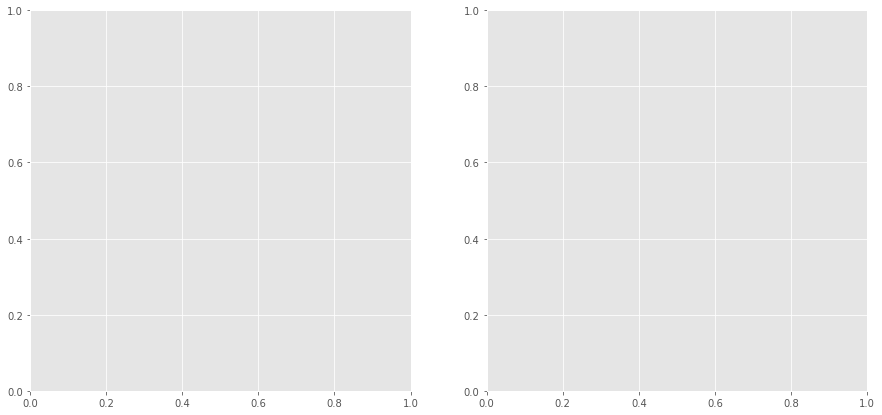

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axes[0].plot(np.arange(0, 100), history.history["acc"], label="train_acc_model1")
axes[0].plot(np.arange(0, 100), history.history["val_acc"], label="val_acc_model1")
axes[0].legend()
axes[1].plot(np.arange(0, 100), history.history["loss"], label="train_loss_model1")
axes[1].plot(np.arange(0, 100), history.history["val_loss"], label="val_loss_model1")
axes[1].legend()
plt.setp(axes[0],title='Acc Result Plot', xlabel="Epoch #", ylabel="Acc")
plt.setp(axes[1],title='Loss Result Plot', xlabel="Epoch #", ylabel="Loss")
fig.tight_layout()
plt.savefig("/content/drive/MyDrive/Model/EvaluationPlaces44.svg")

In [ ]:
lc = [i for i in validation_generator.class_indices.keys()]

In [ ]:
from PIL import Image
import numpy as np

img = Image.open('/content/places365_standard/val/beach_house/Places365_val_00002370.jpg')
img = img.resize((100,100))
img = np.array(img)
img = np.expand_dims(img, axis=0)
img = np.vstack([img])
classes = model.predict(img)
result = lc[np.argmax(classes)]
print('prediction: '+ result)

prediction: ball_pit


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

label = list(validation_generator.class_indices.keys())
num_of_test_samples = len(validation_generator.filenames)

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('\nConfusion Matrix\n')
print(confusion_matrix(validation_generator.classes, y_pred))
print('\n\nClassification Report\n')
print(classification_report(validation_generator.classes, y_pred, target_names=label))


Confusion Matrix

[[0 0 0 ... 0 1 0]
 [1 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 1 2]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Classification Report

                            precision    recall  f1-score   support

                  airfield       0.00      0.00      0.00       100
            airplane_cabin       0.00      0.00      0.00       100
          airport_terminal       0.00      0.00      0.00       100
                    alcove       0.00      0.00      0.00       100
                     alley       0.01      0.01      0.01       100
              amphitheater       0.00      0.00      0.00       100
          amusement_arcade       0.00      0.00      0.00       100
            amusement_park       0.00      0.00      0.00       100
apartment_building-outdoor       0.01      0.01      0.01       100
                  aquarium       0.00      0.00      0.00       100
                  aqueduct       0.01      0.01      0.01       100
                   

In [ ]:
model.evaluate(validation_generator)

286/286 [==============================] - 45s 156ms/step - loss: 1.3326 - acc: 0.6698


[1.3325960636138916, 0.6698082089424133]